<a href="https://colab.research.google.com/github/Nusnan-AM/Research_models/blob/main/randomforest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
sklearn.set_config(display='text')
from sklearn.model_selection import train_test_split,RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Load the Data

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

Mounted at /content/gdrive
 20180501_174635.jpg
 20180501_174733.jpg
 20180501_174736.jpg
 application-aptitude-2020.pdf
'augment_data1 (1).csv'
 augment_data1.csv
 catboost_info
'Colab Notebooks'
 colour_random_jar_model.pkl
'Contact '
'Contact Information.gform'
'Copy of augment_data1.csv'
'Copy of randomforest.ipynb'
'CST20083  AM.NUSNAN.mp4'
'CST382-3_1_Introduction (1).gslides'
'CST382-3_2_Sampling and Quantization.gslides'
'CST WAD  Group - C.gdoc'
 data.csv
'Design Documentation on Boarding Project.gdoc'
'Document from Serial Ghost'
 DSC_0004.JPG
 DSC_0087.JPG
 DSC_0089.JPG
 DSC_0096.JPG
 DSC_0100.JPG
 DSC_0105.JPG
 DSC_0106.JPG
 DSC_0107.JPG
 DSC_0109.JPG
 DSC_0110_1.JPG
 DSC_0111_1.JPG
 DSC_0113.JPG
 DSC_0114_1.JPG
 DSC_0114.JPG
 DSC_0115.JPG
 DSC_0116_1.JPG
 DSC_0117.JPG
 DSC_0119.JPG
 DSC_0124.JPG
 DSC_0125_1.JPG
 DSC_0127.JPG
 DSC_0128.JPG
 DSC_0129.JPG
 DSC_0130.JPG
 DSC_0131.JPG
 DSC_0140.JPG
 DSC_0143_1.JPG
 DSC_0146_1.JPG
 DSC_0147_1.JPG
 DSC_0148_1.JPG
 DSC_0148_2.JPG


In [ ]:
%cd /content/gdrive/MyDrive/

/content/gdrive/MyDrive


In [ ]:
data = pd.read_csv("jartest.csv")

In [ ]:
X_turbidity = data[['Raw_Turbidity', 'Raw_Colour', 'Raw_PH', 'PAC', 'KMnO4','ACD']]
X_ph = data[['Raw_Turbidity', 'Raw_Colour', 'Raw_PH', 'PAC', 'KMnO4','ACD']]
X_colour = data[['Raw_Turbidity', 'Raw_Colour', 'Raw_PH', 'PAC', 'KMnO4','ACD']]
y_turbidity = data['Turbidity']
y_ph = data['PH']
y_colour = data['Colour']

# Model development

## Turbidiy


In [ ]:
X_turbidity_train, X_turbidity_test, y_turbidity_train, y_turbidity_test = train_test_split(X_turbidity, y_turbidity, test_size=0.2, random_state=42)

In [ ]:
model_turbidity =  RandomForestRegressor(
    n_estimators=300,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features="log2",
    max_depth=None,
    bootstrap=False,
    random_state=42
)

In [ ]:
model_turbidity.fit(X_turbidity_train, y_turbidity_train)

RandomForestRegressor(bootstrap=False, max_features='log2', n_estimators=300,
                      random_state=42)

## PH

In [ ]:
X_ph_train, X_ph_test, y_ph_train, y_ph_test = train_test_split(X_ph, y_ph, test_size=0.2, random_state=42)

In [ ]:
model_ph =  RandomForestRegressor(
    n_estimators=200,
    min_samples_split=2,
    min_samples_leaf=2,
    max_features="sqrt",
    max_depth=None,
    bootstrap=False,
    random_state=42
)

In [ ]:
model_ph.fit(X_ph_train, y_ph_train)

RandomForestRegressor(bootstrap=False, max_features='sqrt', min_samples_leaf=2,
                      n_estimators=200, random_state=42)

## Colour

In [ ]:
X_colour_train, X_colour_test, y_colour_train, y_colour_test = train_test_split(X_colour, y_colour, test_size=0.2, random_state=42)

In [ ]:
model_colour = RandomForestRegressor(
    n_estimators=300,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features="log2",
    max_depth=None,
    bootstrap=False,
    random_state=42
)

In [ ]:
model_colour.fit(X_colour_train, y_colour_train)

RandomForestRegressor(bootstrap=False, max_features='log2', n_estimators=300,
                      random_state=42)

## Model Testing & Validation

In [ ]:
y_turbidity_pred = model_turbidity.predict(X_turbidity_test)
y_turbidity_pred

array([13.92557437, 24.1646    , 34.04619477, ..., 18.91268135,
       14.168     , 15.41595007])

In [ ]:
results_Tur = pd.DataFrame({
    'Actual': y_turbidity_test.flatten() if hasattr(y_turbidity_test, 'flatten') else y_turbidity_test,
    'Predicted': y_turbidity_pred.flatten() if hasattr(y_turbidity_pred, 'flatten') else y_turbidity_pred
})


results_Tur

,Actual,Predicted
4607,12.300000,13.925574
4439,22.500000,24.164600
5733,32.542102,34.046195
8224,4.250000,4.250000
360,16.000000,13.560366
...,...,...
3098,10.900000,16.854551
6249,17.376560,17.463976
6620,22.376856,18.912681
2851,15.600000,14.168000


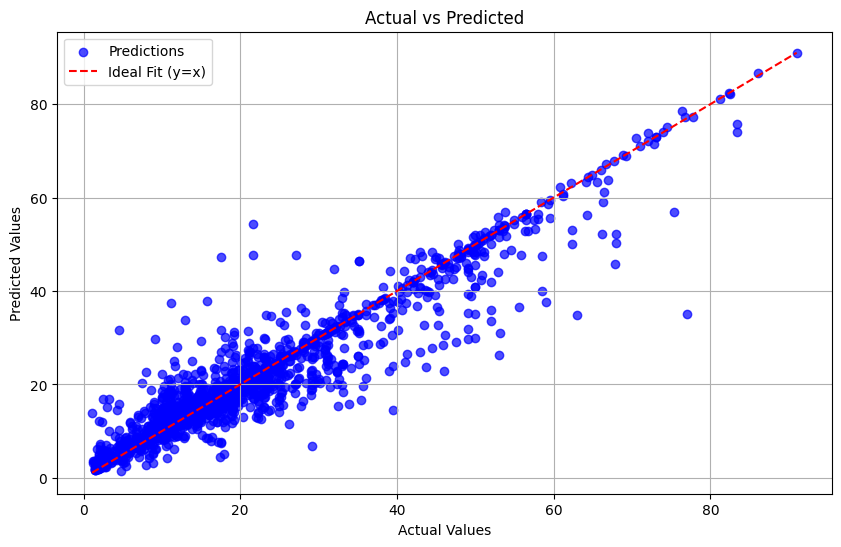

In [ ]:
### plot the actuals and predicted values


import matplotlib.pyplot as plt

# Scatter plot with actual values on the x-axis and predicted values on the y-axis
plt.figure(figsize=(10, 6))

plt.scatter(results_Tur['Actual'], results_Tur['Predicted'], color='blue', alpha=0.7, label='Predictions')

# Adding a reference line (y = x) for comparison
min_val = min(results_Tur['Actual'].min(), results_Tur['Predicted'].min())
max_val = max(results_Tur['Actual'].max(), results_Tur['Predicted'].max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Ideal Fit (y=x)')

# Labels, title, and legend
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid()

# Display the plot
plt.show()


In [ ]:
y_ph_pred = model_ph.predict(X_ph_test)
y_ph_pred

array([7.44286669, 7.30980844, 7.00224713, ..., 7.43685366, 6.93816333,
       7.15932172])

In [ ]:
results_Ph = pd.DataFrame({
    'Actual': y_ph_test.flatten() if hasattr(y_ph_test, 'flatten') else y_ph_test,
    'Predicted': y_ph_pred.flatten() if hasattr(y_ph_pred, 'flatten') else y_ph_pred
})

results_Ph

,Actual,Predicted
4607,7.780000,7.442867
4439,7.390000,7.309808
5733,6.987632,7.002247
8224,7.210000,7.187335
360,6.950000,6.857246
...,...,...
3098,7.010000,6.976188
6249,7.490000,7.490651
6620,7.437389,7.436854
2851,6.890000,6.938163


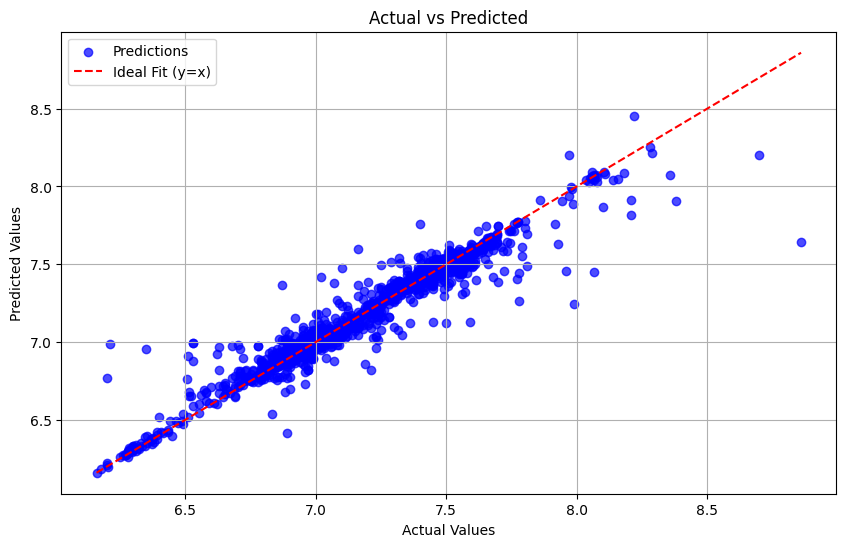

In [ ]:
### plot the actuals and predicted values


import matplotlib.pyplot as plt

# Scatter plot with actual values on the x-axis and predicted values on the y-axis
plt.figure(figsize=(10, 6))

plt.scatter(results_Ph['Actual'], results_Ph['Predicted'], color='blue', alpha=0.7, label='Predictions')

# Adding a reference line (y = x) for comparison
min_val = min(results_Ph['Actual'].min(), results_Ph['Predicted'].min())
max_val = max(results_Ph['Actual'].max(), results_Ph['Predicted'].max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Ideal Fit (y=x)')

# Labels, title, and legend
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid()

# Display the plot
plt.show()


In [ ]:
y_colour_pred = model_colour.predict(X_colour_test)
y_colour_pred

array([ 61.8062815 ,  35.83666667, 119.39377415, ..., 251.44803097,
        26.81666667, 123.46966194])

In [ ]:
results_Colo = pd.DataFrame({
    'Actual': y_colour_test.flatten() if hasattr(y_colour_test, 'flatten') else y_colour_test,
    'Predicted': y_colour_pred.flatten() if hasattr(y_colour_pred, 'flatten') else y_colour_pred
})

results_Colo

,Actual,Predicted
4607,43.000000,61.806281
4439,35.000000,35.836667
5733,135.379917,119.393774
8224,135.000000,135.000000
360,31.000000,21.253333
...,...,...
3098,13.000000,40.697170
6249,193.261124,190.597738
6620,243.031551,251.448031
2851,30.000000,26.816667


In [ ]:
# prompt: Using dataframe results_Colo: give the out with row index in new interactive sheet

!pip install itables
from itables import init_notebook_mode, show
init_notebook_mode(all_interactive=True)

# Recreate the DataFrame results_Colo just in case it was overwritten
results_Colo = pd.DataFrame({
    'Actual': y_colour_test.flatten() if hasattr(y_colour_test, 'flatten') else y_colour_test,
    'Predicted': y_colour_pred.flatten() if hasattr(y_colour_pred, 'flatten') else y_colour_pred
})

# Display the filtered dataframe with row index
show(results_Colo)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 54.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 59.7 MB/s eta 0:00:00


Loading ITables v2.4.2 from the internet... (need help?)


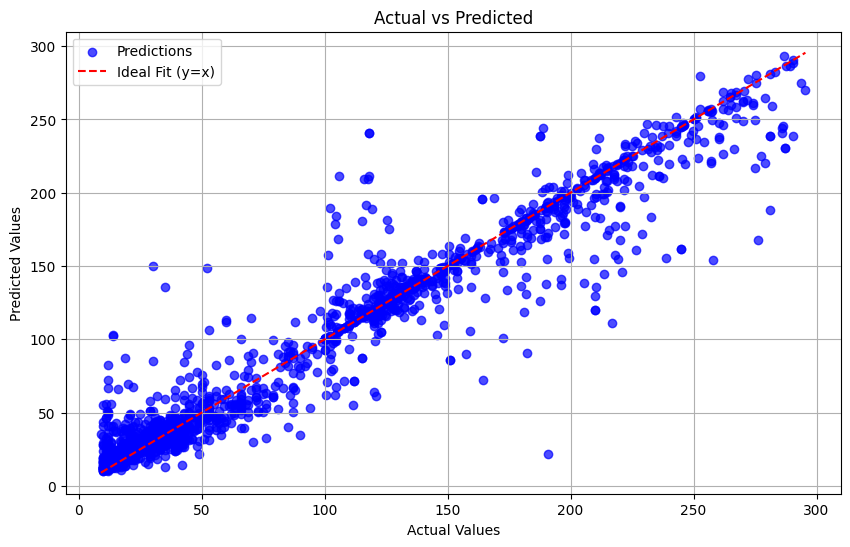

In [ ]:
### plot the actuals and predicted values


import matplotlib.pyplot as plt

# Scatter plot with actual values on the x-axis and predicted values on the y-axis
plt.figure(figsize=(10, 6))

plt.scatter(results_Colo['Actual'], results_Colo['Predicted'], color='blue', alpha=0.7, label='Predictions')

# Adding a reference line (y = x) for comparison
min_val = min(results_Colo['Actual'].min(), results_Colo['Predicted'].min())
max_val = max(results_Colo['Actual'].max(), results_Colo['Predicted'].max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Ideal Fit (y=x)')

# Labels, title, and legend
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid()

# Display the plot
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_model(y_test, y_pred, target_name):
    r2 = r2_score(y_test, y_pred)
    accuracy = r2 * 100  # Convert R² to percentage
    print(f"\nEvaluation Metrics for {target_name}:")
    print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred):.2f}")
    print(f"R-squared (R²): {r2:.2f}")


evaluate_model(y_turbidity_test, y_turbidity_pred, "Turbidity")
evaluate_model(y_ph_test, y_ph_pred, "PH")
evaluate_model(y_colour_test, y_colour_pred, "Colour")



Evaluation Metrics for Turbidity:
Mean Absolute Error (MAE): 2.94
R-squared (R²): 0.88

Evaluation Metrics for PH:
Mean Absolute Error (MAE): 0.05
R-squared (R²): 0.93

Evaluation Metrics for Colour:
Mean Absolute Error (MAE): 10.91
R-squared (R²): 0.93


In [ ]:
# import joblib

# # Save models
# joblib.dump(model_turbidity, 'turbidity_random_jar_model.pkl')
# joblib.dump(model_ph, 'ph_random_jar_model.pkl')
# joblib.dump(model_colour, 'colour_random_jar_model.pkl')

# Validation

In [ ]:
import pandas as pd

def predict_from_input():
    print("Enter the following feature values:")
    try:
        raw_turbidity = float(input("Raw Turbidity: "))
        raw_ph = float(input("Raw PH: "))
        raw_colour = float(input("Raw Colour: "))
        pac = float(input("PAC: "))
        kmno4 = float(input("KMnO4: "))
        acd = float(input("ACD: "))

        # Combine inputs into a DataFrame
        input_data = pd.DataFrame({
            'Raw_Turbidity': [raw_turbidity],
            'Raw_Colour': [raw_colour],
            'Raw_PH': [raw_ph],
            'PAC': [pac],
            'KMnO4': [kmno4],
            'ACD': [acd]
        })

        # Ensure models are defined
        if 'model_turbidity' not in globals() or 'model_ph' not in globals() or 'model_colour' not in globals():
            print("Error: Models are not defined. Ensure they are trained before calling this function.")
            return

        # Make predictions
        turbidity_pred = model_turbidity.predict(input_data)
        ph_pred = model_ph.predict(input_data)
        colour_pred = model_colour.predict(input_data)

        # Display predictions
        print("\nPredicted Values:")
        print(f"Turbidity: {turbidity_pred[0]:.2f}")
        print(f"PH: {ph_pred[0]:.2f}")
        print(f"Colour: {colour_pred[0]:.2f}")

    except ValueError:
        print("Invalid input. Please enter numeric values only.")

# Call the function to test
predict_from_input()


Enter the following feature values:
Raw Turbidity: 90.4
Raw PH: 7.07
Raw Colour: 500
PAC: 2.5
KMnO4: 0.4
ACD: 0.5

Predicted Values:
Turbidity: 25.18
PH: 7.01
Colour: 96.86


# HyperParameter Tuning

## turbidity

In [ ]:
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False],
    'max_samples': [None, 0.8, 0.9]
}


In [ ]:
!pip install scikit-learn

In [ ]:
model= RandomForestRegressor(random_state=42)

# Set up GridSearchCV
grid_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    scoring='neg_mean_squared_error',  # Metric for evaluation
    cv=5,  # 5-fold cross-validation
    verbose=1,  # Print progress
    n_jobs=-1  # Use all available processors
)



In [ ]:
# Perform GridSearchCV to find the best hyperparameters
grid_search.fit(X_turbidity_train,y_turbidity_train)


print("Best Parameters:", grid_search.best_params_)
print("Best Score:", -grid_search.best_score_)  # Convert to positive MSE

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
30 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py", line 431, in fit
    raise ValueError(
ValueError:

Best Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_samples': None, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': True}
Best Score: 48.16196848202734


## **ph**

In [ ]:
grid_search.fit(X_ph_train, y_ph_train)


print("Best Parameters:", grid_search.best_params_)
print("Best Score:", -grid_search.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}
Best Score: 0.016428313884297503


## Colour

In [ ]:
grid_search.fit(X_colour_train, y_colour_train)


print("Best Parameters:", grid_search.best_params_)
print("Best Score:", -grid_search.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_samples': 0.7, 'max_depth': 9}
Best Score: 939.6298499530214
